<a href="https://colab.research.google.com/github/san9roy/Space-and-Astronomy/blob/main/FFT_And_Signal_to_Noise_Ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Found 129 images. Example paths:
1: /content/drive/MyDrive/fft_signal_image_processing/IMG_0976.JPG
2: /content/drive/MyDrive/fft_signal_image_processing/IMG_0977.JPG
3: /content/drive/MyDrive/fft_signal_image_processing/IMG_0975.JPG
4: /content/drive/MyDrive/fft_signal_image_processing/IMG_0974.JPG
5: /content/drive/MyDrive/fft_signal_image_processing/IMG_0973.JPG
Stackable images array shape: (129, 512, 512)


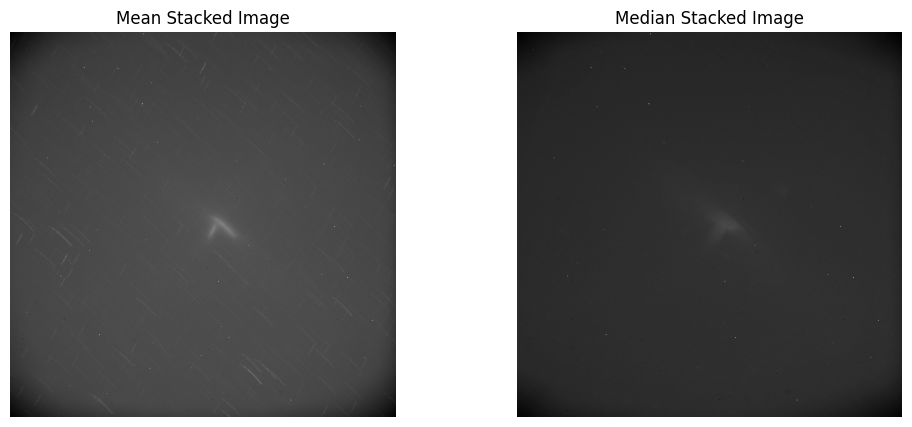

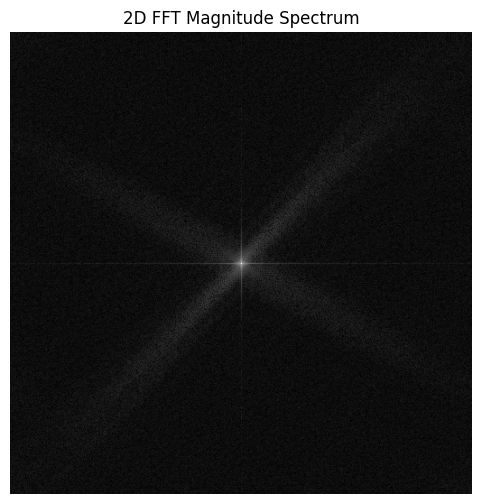

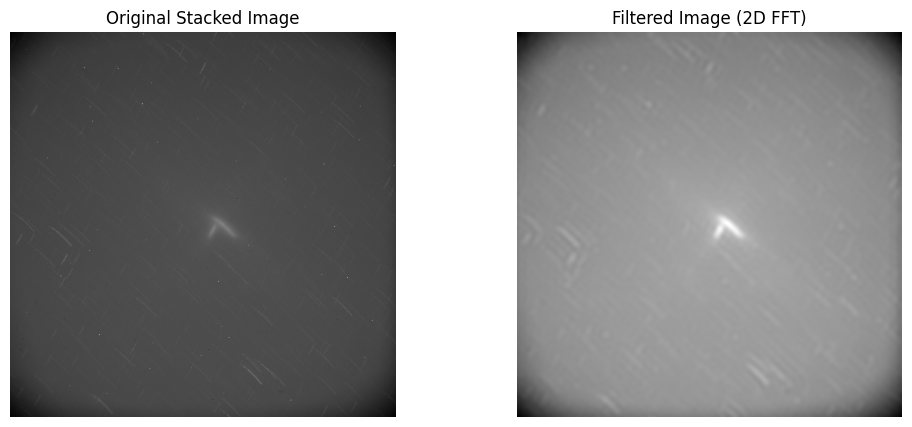

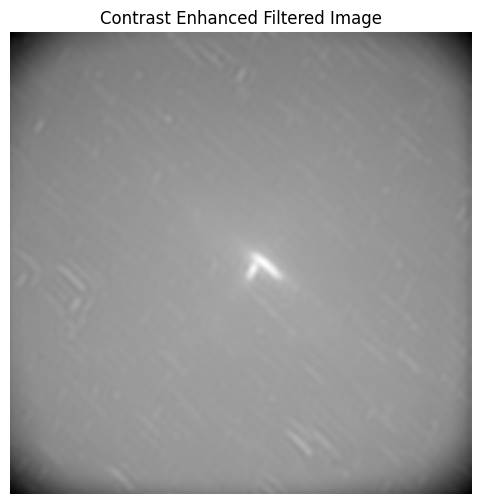

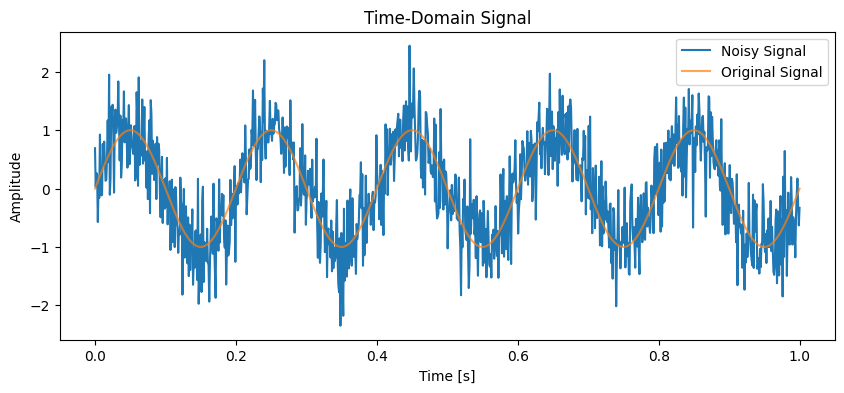

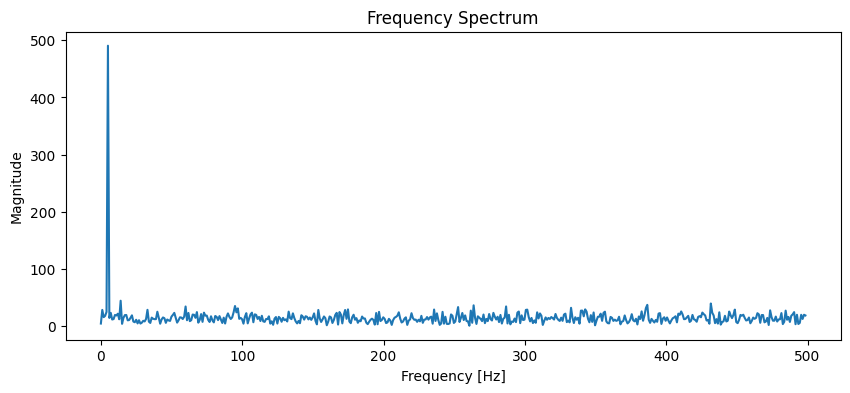

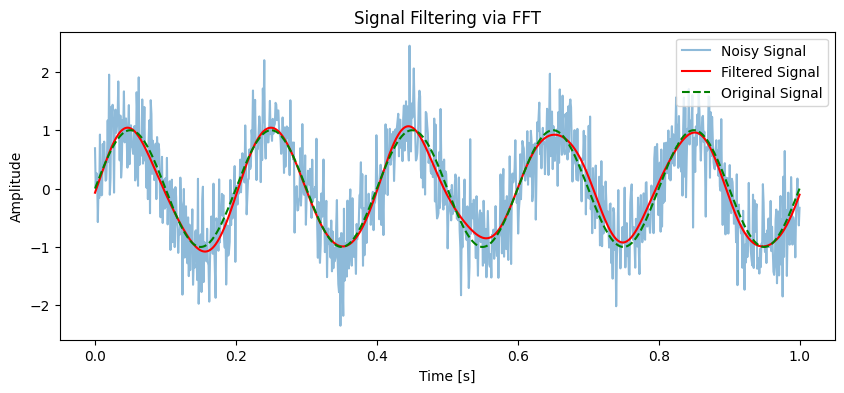

Notebook execution complete 


In [4]:
# ======================================================
# FFT-Based Signal and Image Processing
# ======================================================
# Author: Sanglap Roy
# Description: Demonstrates FFT-based noise reduction for 1D signals and 2D images

# ==========================
# Part 0: Import Libraries
# ==========================
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
from google.colab import drive

# ==========================
# Part 1: Mount Google Drive
# ==========================
drive.mount('/content/drive', force_remount=True)

# ==========================
# Part 2: Specify Folder in Drive
# ==========================
# Replace this with your folder path in Google Drive
# Example: 'MyDrive/fft_signal_image_processing'
folder_in_drive = '/content/drive/MyDrive/fft_signal_image_processing'

if not os.path.exists(folder_in_drive):
    raise ValueError(f"The folder does not exist: {folder_in_drive}")

# ==========================
# Part 3: Collect All Images
# ==========================
image_paths = []
# Search for all common image extensions (case-insensitive)
for ext in ['jpg', 'jpeg', 'png', 'JPG', 'JPEG', 'PNG']:
    image_paths.extend(glob(os.path.join(folder_in_drive, f'*.{ext}')))

if len(image_paths) == 0:
    raise ValueError(f"No images found in {folder_in_drive}. Ensure they are jpg, jpeg, or png.")

print(f"Found {len(image_paths)} images. Example paths:")
for i, path in enumerate(image_paths[:5]):
    print(f"{i+1}: {path}")

# ==========================
# Part 4: Load and Resize Images
# ==========================
images = []
target_shape = (512, 512)  # resize all images to 512x512 for stacking

for path in image_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img_resized = cv2.resize(img, target_shape)
        images.append(img_resized.astype(np.float32)/255.0)

images = np.array(images)
print(f"Stackable images array shape: {images.shape}")  # (N_images, 512, 512)

# ==========================
# Part 5: Image Stacking
# ==========================
stack_mean = np.mean(images, axis=0)
stack_median = np.median(images, axis=0)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(stack_mean, cmap='gray')
plt.title('Mean Stacked Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(stack_median, cmap='gray')
plt.title('Median Stacked Image')
plt.axis('off')
plt.show()

# ==========================
# Part 6: 2D FFT Filtering
# ==========================
image = stack_mean  # choose mean stacked image
fft2 = np.fft.fft2(image)
fft2_shift = np.fft.fftshift(fft2)
magnitude_spectrum = np.abs(fft2_shift)

plt.figure(figsize=(6,6))
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.title('2D FFT Magnitude Spectrum')
plt.axis('off')
plt.show()

# Apply low-pass circular mask
rows, cols = image.shape
crow, ccol = rows//2, cols//2
radius = int(0.2 * min(crow, ccol))  # central 20% frequency
mask = np.zeros_like(image)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
mask[mask_area] = 1

fft2_shift_filtered = fft2_shift * mask
fft2_filtered = np.fft.ifftshift(fft2_shift_filtered)
image_filtered = np.fft.ifft2(fft2_filtered)
image_filtered = np.abs(image_filtered)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Stacked Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_filtered, cmap='gray')
plt.title('Filtered Image (2D FFT)')
plt.axis('off')
plt.show()

# ==========================
# Part 7: Contrast Enhancement
# ==========================
image_enhanced = (image_filtered - np.min(image_filtered)) / (np.max(image_filtered) - np.min(image_filtered))

plt.figure(figsize=(6,6))
plt.imshow(image_enhanced, cmap='gray')
plt.title('Contrast Enhanced Filtered Image')
plt.axis('off')
plt.show()

# ==========================
# Part 8: 1D Signal FFT
# ==========================
# Simulated noisy sine wave
t = np.linspace(0, 1, 1000)
signal = np.sin(2*np.pi*5*t)
noise = 0.5*np.random.normal(size=len(t))
noisy_signal = signal + noise

plt.figure(figsize=(10,4))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, signal, label='Original Signal', alpha=0.7)
plt.title('Time-Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# FFT
fft_vals = np.fft.fft(noisy_signal)
freqs = np.fft.fftfreq(len(t), d=t[1]-t[0])

plt.figure(figsize=(10,4))
plt.plot(freqs[:500], np.abs(fft_vals)[:500])
plt.title('Frequency Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

# Low-pass filter (~12 Hz)
cutoff = 12
fft_filtered = fft_vals.copy()
fft_filtered[np.abs(freqs) > cutoff] = 0
filtered_signal = np.fft.ifft(fft_filtered)

plt.figure(figsize=(10,4))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(t, filtered_signal.real, label='Filtered Signal', color='red')
plt.plot(t, signal, label='Original Signal', linestyle='dashed', color='green')
plt.title('Signal Filtering via FFT')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print("Notebook execution complete ")
